In [1]:
from math import cos,sin
from scipy import optimize
import numpy as np
from scipy import linalg
from scipy import stats

In [2]:
def f(x):
    x0,x1,x2=x.tolist()
    return[
        5*x1+3,
        4*x0*x0-2*sin(x1*x2),
        x1*x2-1.5
    ]

result=optimize.fsolve(f,[1,1,1])
print(result)

[-0.70622057 -0.6        -2.5       ]


In [3]:
def func(x,p):
    A,k,theta=p
    return A*np.sin(2*np.pi*k*x+theta)

def func_error(p,y,x):
    return np.sum((y-func(x,p))**2)

In [4]:
def residuals(p,y,x):
    return y-func(x,p)

x=np.linspace(0,2*np.pi,100)
A,k,theta=10,0.34,np.pi/6
y0=func(x,[A,k,theta])
np.random.seed(1)
y1=y0+2*np.random.randn(len(x))

p0=[1,0.4,0]

plsq=optimize.leastsq(residuals,p0,args=(y1,x))

print([A,k,theta])
print(plsq[0])



[10, 0.34, 0.5235987755982988]
[ 10.15539158   0.3401421    0.52133354]


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False  

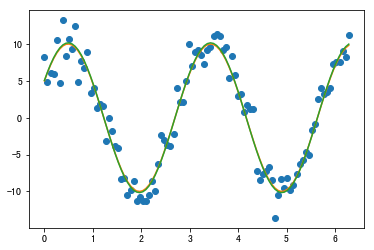

In [6]:
plt.plot(x,y1,"o",label="test")
plt.plot(x,y0,label="real")
plt.plot(x,func(x,plsq[0]),label="fit")
plt.show()

In [7]:
result=optimize.basinhopping(func_error,(1,1,1),niter=10,minimizer_kwargs={"method":"L-BFGS-B","args":(y1,x)})

/home/leilichuan/anaconda3/lib/python3.6/site-packages/scipy/optimize/_basinhopping.py:299: RuntimeWarning: overflow encountered in exp
  w = min(1.0, np.exp(-(energy_new - energy_old) * self.beta))


In [8]:
result.x

array([ 10.15539175,   0.34014212,   0.52133305])

In [9]:
X=stats.norm(loc=1.,scale=2.)
X.stats()

(array(1.0), array(4.0))

In [10]:
x=X.rvs(size=10000)
print(np.mean(x),np.var(x))

1.01869105676 3.98759204196


In [11]:
stats.norm.fit(x)

(1.0186910567644842, 1.9968956011679377)

In [12]:
x=range(1,7)
p=(0.4,0.2,0.1,0.1,0.1,0.1)
dice=stats.rv_discrete(values=(x,p))
dice.rvs

<bound method rv_discrete.rvs of <scipy.stats._distn_infrastructure.rv_sample object at 0x7fea84e97b38>>

In [13]:
np.random.seed(20)
samples=dice.rvs(size=(20000,50))
samples_mean=np.mean(samples,axis=1)

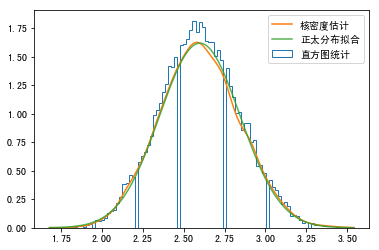

In [14]:
_,bins,step=plt.hist(samples_mean,bins=100,normed=True,histtype="step",label='直方图统计')
kde=stats.kde.gaussian_kde(samples_mean)

x=np.linspace(bins[0],bins[-1],100)
plt.plot(x,kde(x),label='核密度估计')
mean,std=stats.norm.fit(samples_mean)
plt.plot(x,stats.norm(mean,std).pdf(x),alpha=0.8,label='正太分布拟合')
plt.legend()
plt.show()


In [15]:
stats.binom.pmf(range(6),5,1/6.0)

array([  4.01877572e-01,   4.01877572e-01,   1.60751029e-01,
         3.21502058e-02,   3.21502058e-03,   1.28600823e-04])

In [16]:
def sim_gamma(lambda_,time,k):
    t=np.random.uniform(0,time,size=lambda_*time)
    t.sort()
    interval=t[k:]-t[:-k]
    #print(interval.shape)
    dist,interval_edges=np.histogram(interval,bins=100,density=True)
    x=(interval_edges[1:]+interval_edges[:-1])/2
    gamma=stats.gamma.pdf(x,k,scale=1/lambda_)
    return x,gamma,dist

In [17]:
lambda_=10
time=1000
ks=1,2
x1,gamma1,dist1=sim_gamma(lambda_,time,ks[0])
x2,gamma2,dist2=sim_gamma(lambda_,time,ks[1])

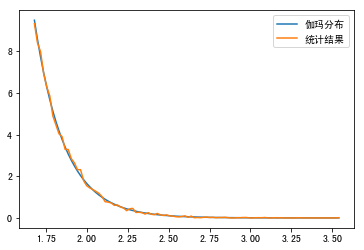

In [18]:
plt.plot(x,gamma1,label="伽玛分布")
plt.plot(x,dist1,label="统计结果")
plt.legend()
plt.show()

In [19]:
T=100000
A_count=int(T/5)
B_count=int(T/10)
A_time=np.random.uniform(0,T,A_count)
B_time=np.random.uniform(0,T,B_count)

bus_time=np.concatenate((A_time,B_time))
bus_time.sort()
N=200000
passenger_time=np.random.uniform(bus_time[0],bus_time[-1],N)
idx=np.searchsorted(bus_time,passenger_time)
np.mean(bus_time[idx]-passenger_time)*60

200.81397628161244

In [29]:
mu=0.0
n=10
samples=stats.norm(mu).rvs(size=(100000,n))
t_samples=(np.mean(samples,axis=1)-mu)/np.std(samples,ddof=1,axis=1)*n**0.5
sample_dist,x=np.histogram(t_samples,bins=100,density=True)
x=0.5*(x[:-1]+x[1:])
t_dist=stats.t(n-1).pdf(x)
print("max error:",np.max(np.abs(sample_dist-t_dist)))

max error: 0.00691062422112


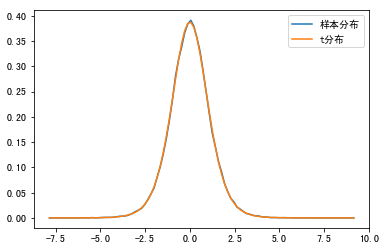

In [34]:
plt.plot(x,sample_dist,label="样本分布")
plt.plot(x,t_dist,label="t分布")
plt.legend()
plt.show()

T检验

In [33]:
n=30
np.random.seed(42)
s=stats.norm.rvs(loc=1,scale=0.8,size=n)
t=(np.mean(s)-0.5)/(np.std(s,ddof=1)/np.sqrt(n))
print(t,stats.ttest_1samp(s,0.5))

2.65858434088 Ttest_1sampResult(statistic=2.6585843408822241, pvalue=0.012637702257091229)


In [37]:
print((np.mean(s)-1)/(np.std(s,ddof=1)/np.sqrt(n)))
print(stats.ttest_1samp(s,1),stats.ttest_1samp(s,0.9))

-1.14501736704
Ttest_1sampResult(statistic=-1.1450173670383303, pvalue=0.26156414618801477) Ttest_1sampResult(statistic=-0.38429702545421962, pvalue=0.70356191034252025)


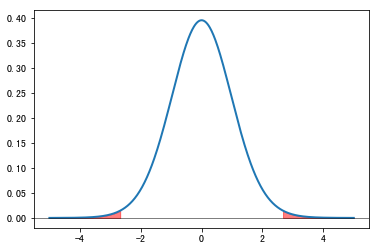

In [42]:
x=np.linspace(-5,5,500)
y=stats.t(n-1).pdf(x)
plt.plot(x,y,lw=2)
t,p=stats.ttest_1samp(s,0.5)
mask=x>np.abs(t)
plt.fill_between(x[mask],y[mask],color="red",alpha=0.5)
mask=x<-np.abs(t)
plt.fill_between(x[mask],y[mask],color="red",alpha=0.5)
plt.axhline(color="k",lw=0.5)
plt.show()

In [45]:
from scipy import integrate
x=np.linspace(-10,10,10000)
y=stats.t(n-1).pdf(x)
mask=x>=np.abs(t)
integrate.trapz(y[mask],x[mask])*2

0.012617282618324599

卡方分布

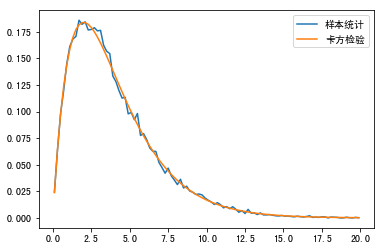

In [54]:
a=np.random.normal(size=(30000,4))
cs=np.sum(a**2,axis=1)

sample_dist,bins=np.histogram(cs,bins=100,range=(0,20),density=True)
x=0.5*(bins[:-1]+bins[1:])
chi2_dist=stats.chi2.pdf(x,4)
plt.plot(x,sample_dist,label="样本统计")
plt.plot(x,chi2_dist,label="卡方检验")
plt.legend()
plt.show()

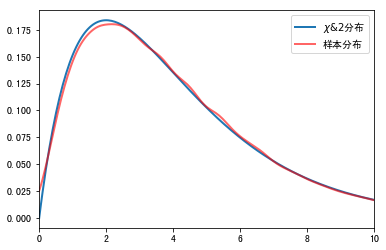

In [61]:
repeat_count=60000
n,k=100,5

np.random.seed(42)
ball_ids=np.random.randint(0,k,size=(repeat_count,n))
counts=np.apply_along_axis(np.bincount,1,ball_ids,minlength=k)
cs2=np.sum((counts-n/k)**2/(n/k),axis=1)
k=stats.kde.gaussian_kde(cs2)
x=np.linspace(0,10,200)
plt.plot(x,stats.chi2.pdf(x,4),lw=2,label="$\chi&{2}$分布")
plt.plot(x,k(x),lw=2,color="red",alpha=0.6,label="样本分布")
plt.legend()
plt.xlim(0,10)
plt.show()

In [65]:
def half_sphere(x,y):
    return (1-x**2-y**2)**0.5

def half_circle(x):
    return (1-x**2)**0.5

volume,error=integrate.dblquad(half_sphere,-1,1,lambda x:-half_circle(x),lambda x:half_circle(x))
print(volume,error,np.pi*4/3/2)

2.0943951023931984 1.0002354500215915e-09 2.0943951023931953


In [66]:
from scipy import interpolate

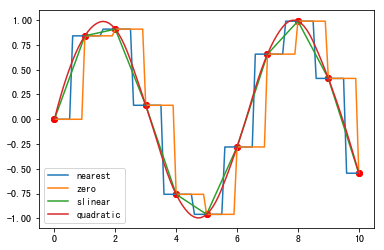

In [68]:
x=np.linspace(0,10,11)
y=np.sin(x)
xnew=np.linspace(0,10,101)
plt.plot(x,y,"ro")
for kind in ["nearest","zero","slinear","quadratic"]:
    f=interpolate.interp1d(x,y,kind)
    ynew=f(xnew)
    plt.plot(xnew,ynew,label=str(kind))
plt.legend()
plt.show()

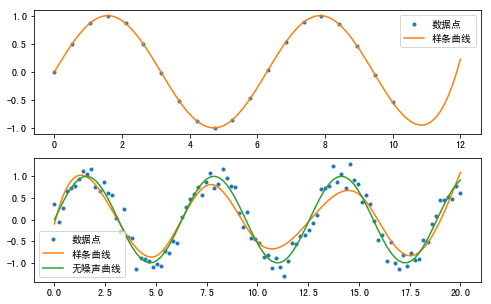

In [76]:
x1=np.linspace(0,10,20)
y1=np.sin(x1)
sx1=np.linspace(0,12,100)
sy1=interpolate.UnivariateSpline(x1,y1,s=0)(sx1)

x2=np.linspace(0,20,100)
y2=np.sin(x2)+np.random.standard_normal(len(x2))*0.2
sx2=np.linspace(0,20,2000)
spline2=interpolate.UnivariateSpline(x2,y2,s=8)
sy2=spline2(sx2)
plt.figure(figsize=(8,5))
plt.subplot(211)

plt.plot(x1,y1,".",label="数据点")
plt.plot(sx1,sy1,label="样条曲线")
plt.legend()

plt.subplot(212)
plt.plot(x2,y2,".",label="数据点")
plt.plot(sx2,sy2,label="样条曲线")
plt.plot(x2,np.sin(x2),label="无噪声曲线")
plt.legend()
plt.show()